In [38]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# you can specify the revision tag if you don't want the timm dependency
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model = model.train()
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Detected remote with confidence 0.998 at location [40.52, 71.9, 174.7, 119.05]
Detected remote with confidence 0.994 at location [335.14, 71.58, 367.95, 187.2]
Detected couch with confidence 0.993 at location [-0.11, 1.17, 639.78, 474.05]
Detected cat with confidence 0.998 at location [14.53, 54.65, 316.05, 470.0]
Detected cat with confidence 0.999 at location [347.66, 24.93, 640.3, 371.48]


In [42]:
model

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): ResNetBackbone(
          (embedder): ResNetEmbeddings(
            (embedder): ResNetConvLayer(
              (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
              (normalization): DetrFrozenBatchNorm2d()
              (activation): ReLU()
            )
            (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          )
          (encoder): ResNetEncoder(
            (stages): ModuleList(
              (0): ResNetStage(
                (layers): Sequential(
                  (0): ResNetBottleNeckLayer(
                    (shortcut): ResNetShortCut(
                      (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                      (normalization): DetrFrozenBatchNorm2d()
                    )
                    (layer): Seq

In [45]:
model

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): ResNetBackbone(
          (embedder): ResNetEmbeddings(
            (embedder): ResNetConvLayer(
              (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
              (normalization): DetrFrozenBatchNorm2d()
              (activation): ReLU()
            )
            (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          )
          (encoder): ResNetEncoder(
            (stages): ModuleList(
              (0): ResNetStage(
                (layers): Sequential(
                  (0): ResNetBottleNeckLayer(
                    (shortcut): ResNetShortCut(
                      (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                      (normalization): DetrFrozenBatchNorm2d()
                    )
                    (layer): Seq

In [44]:
print(model.model.backbone.training)  # Должно быть True


True


In [41]:
train_count = sum(1 for m in model.model.modules() if m.training)
eval_count = sum(1 for m in model.model.modules() if not m.training)
print(f"Train: {train_count}, Eval: {eval_count}")

Train: 460, Eval: 0


In [11]:
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")

In [13]:
# Функция для анализа замороженных параметров
def check_frozen_layers(model):
    total_params = 0
    frozen_params = 0
    
    for name, param in model.named_parameters():
        total_params += param.numel()
        if not param.requires_grad:
            frozen_params += param.numel()
            print(f"Заморожен: {name}")
    
    print(f"\nВсего параметров: {total_params:,}")
    print(f"Заморожено параметров: {frozen_params:,} ({frozen_params/total_params:.1%})")
    print(f"Обучаемых параметров: {total_params - frozen_params:,} ({(total_params - frozen_params)/total_params:.1%})")

# Проверка модели
check_frozen_layers(model)

Заморожен: model.backbone.conv_encoder.model.embedder.embedder.convolution.weight
Заморожен: model.backbone.conv_encoder.model.encoder.stages.0.layers.0.shortcut.convolution.weight
Заморожен: model.backbone.conv_encoder.model.encoder.stages.0.layers.0.layer.0.convolution.weight
Заморожен: model.backbone.conv_encoder.model.encoder.stages.0.layers.0.layer.1.convolution.weight
Заморожен: model.backbone.conv_encoder.model.encoder.stages.0.layers.0.layer.2.convolution.weight
Заморожен: model.backbone.conv_encoder.model.encoder.stages.0.layers.1.layer.0.convolution.weight
Заморожен: model.backbone.conv_encoder.model.encoder.stages.0.layers.1.layer.1.convolution.weight
Заморожен: model.backbone.conv_encoder.model.encoder.stages.0.layers.1.layer.2.convolution.weight
Заморожен: model.backbone.conv_encoder.model.encoder.stages.0.layers.2.layer.0.convolution.weight
Заморожен: model.backbone.conv_encoder.model.encoder.stages.0.layers.2.layer.1.convolution.weight
Заморожен: model.backbone.conv_enco

In [14]:
model

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): ResNetBackbone(
          (embedder): ResNetEmbeddings(
            (embedder): ResNetConvLayer(
              (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
              (normalization): DetrFrozenBatchNorm2d()
              (activation): ReLU()
            )
            (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          )
          (encoder): ResNetEncoder(
            (stages): ModuleList(
              (0): ResNetStage(
                (layers): Sequential(
                  (0): ResNetBottleNeckLayer(
                    (shortcut): ResNetShortCut(
                      (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                      (normalization): DetrFrozenBatchNorm2d()
                    )
                    (layer): Seq

In [10]:
inputs

{'pixel_values': tensor([[[[ 0.2796,  0.3138,  0.3481,  ..., -0.2856, -0.3369, -0.3712],
          [ 0.2624,  0.2967,  0.3309,  ..., -0.2342, -0.3369, -0.4054],
          [ 0.2453,  0.2796,  0.3138,  ..., -0.1486, -0.3369, -0.4739],
          ...,
          [ 1.8208,  1.7865,  1.7523,  ..., -0.3541, -0.4911, -0.5938],
          [ 1.9064,  1.9235,  1.9578,  ..., -0.6452, -0.7137, -0.7650],
          [ 1.9578,  2.0092,  2.0948,  ..., -0.8507, -0.8678, -0.8678]],

         [[-1.5980, -1.5980, -1.5980,  ..., -1.8081, -1.8431, -1.8606],
          [-1.6155, -1.5980, -1.5980,  ..., -1.7731, -1.8081, -1.8431],
          [-1.6506, -1.6155, -1.5805,  ..., -1.7381, -1.7731, -1.8081],
          ...,
          [-0.5651, -0.6001, -0.6352,  ..., -1.9482, -1.9132, -1.8782],
          [-0.3901, -0.3725, -0.3375,  ..., -1.7381, -1.7731, -1.7906],
          [-0.2850, -0.2150, -0.1275,  ..., -1.5980, -1.6856, -1.7381]],

         [[-0.8284, -0.7587, -0.6367,  ..., -1.1247, -1.1944, -1.2293],
          [-0

In [71]:
from typing import Optional, Callable, Dict, Any
import os
import torch
from torchvision.datasets import CocoDetection
from transformers import DetrImageProcessor
import torch.nn.functional as F

def pad_to_size(image_tensor, target_size=(1280, 1280)):
    """
    Добавляет паддинг к изображению до target_size (H, W)
    Args:
        image_tensor: torch.Tensor [B, C, H, W] или [C, H, W]
        target_size: кортеж (height, width)
    Returns:
        Padded tensor [B, C, target_height, target_width]
    """
    # Приводим к 4D если необходимо
    if len(image_tensor.shape) == 3:
        image_tensor = image_tensor.unsqueeze(0)  # [1, C, H, W]
    
    _, _, h, w = image_tensor.shape
    target_h, target_w = target_size
    
    # Вычисляем паддинг (снизу и справа)
    pad_h = max(target_h - h, 0)
    pad_w = max(target_w - w, 0)
    
    # Паддинг в формате (left, right, top, bottom)
    padding = (0, pad_w, 0, pad_h)
    
    # Добавляем паддинг (рефлективный или константный)
    return F.pad(image_tensor, padding, mode='constant', value=0)


class CocoDetectionTransforms(CocoDetection):
    def __init__(
        self,
        set_name: str,
        trans: Optional[Callable] = None,
    ):
        self.set_name = set_name
        root = os.path.join('../../modeling-yolov8/crop_dataset_' + self.set_name, 'images')
        annotation_file = os.path.join(root, "_annotations.coco.json")
        self.processor = DetrImageProcessor.from_pretrained(
            'facebook/detr-resnet-50',
            revision="no_timm",
            size={'max_height': 1280, 'max_width': 1280},
        )
        self.num_classes = 11
        super().__init__(root=root, annFile=annotation_file)

    def _normalize_bbox(self, bbox, img_width, img_height):
        """Нормализует bbox в формат [x_center, y_center, width, height] с координатами [0, 1]"""
        x_min, y_min, x_max, y_max = bbox
        
        # Проверка валидности координат
        assert x_min < x_max and y_min < y_max, f"Invalid bbox coordinates: {bbox}"
        assert 0 <= x_min <= img_width and 0 <= x_max <= img_width, f"X coordinates out of range: {bbox}"
        assert 0 <= y_min <= img_height and 0 <= y_max <= img_height, f"Y coordinates out of range: {bbox}"
        
        x_center = ((x_min + x_max) / 2) / img_width
        y_center = ((y_min + y_max) / 2) / img_height
        width = (x_max - x_min) / img_width
        height = (y_max - y_min) / img_height
        
        return [x_center, y_center, width, height]

    def __getitem__(self, idx: int) -> Dict[str, Any]:
        img, target = super().__getitem__(idx)
        image_id = self.ids[idx]
        img_info = self.coco.loadImgs(image_id)[0]
        orig_w, orig_h = img_info["width"], img_info["height"]
        
        # Обработка через процессор DETR
        inputs = self.processor(
            images=img, 
            return_tensors="pt",
            size={"max_height": 1280, "max_width": 1280}
        )
        
        # Подготовка targets для DETR
        detr_target = {
            "image_id": torch.tensor([image_id], dtype=torch.int64),
            "size": torch.as_tensor([1280, 1280], dtype=torch.int64),
            "orig_size": torch.as_tensor([orig_h, orig_w], dtype=torch.int64),
            "boxes": [],
            "class_labels": [],
            "norm_boxes": [],
        }
        
        for ann in target:
            bbox = ann["bbox"]
            x_min, y_min, w, h = bbox
            x_max, y_max = x_min + w, y_min + h
            
            # Проверка валидности bbox
            if w > 0 and h > 0:
                try:
                    # Нормализуем bbox
                    normalized_bbox = self._normalize_bbox(
                        [x_min, y_min, x_max, y_max],
                        1280,
                        1280,
                    )
                    detr_target["norm_boxes"].append(normalized_bbox)
                    detr_target["boxes"].append([x_min, y_min, x_max, y_max])
                    detr_target["class_labels"].append(ann["category_id"])
                except AssertionError as e:
                    print(f"Skipping invalid bbox {bbox} in image {image_id}: {str(e)}")
                    continue
        
        # Конвертация в тензоры
        if len(detr_target["boxes"]) > 0:
            detr_target["boxes"] = torch.as_tensor(detr_target["boxes"], dtype=torch.float32)
            detr_target["class_labels"] = torch.as_tensor(detr_target["class_labels"], dtype=torch.int64)
        else:
            # Пустые аннотации
            detr_target["boxes"] = torch.zeros((0, 4), dtype=torch.float32)
            detr_target["class_labels"] = torch.zeros(0, dtype=torch.int64)
        
        # Обработка и паддинг изображения
        pixel_values = pad_to_size(inputs["pixel_values"])  # [1, C, H, W]
        pixel_mask = pad_to_size(inputs["pixel_mask"])      # [1, H, W]
        
        return {
            "pixel_values": pixel_values.squeeze(0),  # [C, H, W]
            "pixel_mask": pixel_mask.squeeze(0),      # [H, W]
            "labels": detr_target,
        }

In [72]:
dataset_train = CocoDetectionTransforms('train')

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


In [77]:
dataset_train[2]

{'pixel_values': tensor([[[0.5536, 0.5536, 0.5536,  ..., 0.7077, 0.8276, 0.8618],
          [0.5536, 0.5536, 0.5536,  ..., 0.9132, 0.9988, 0.9132],
          [0.5536, 0.5536, 0.5536,  ..., 0.9817, 0.9988, 1.0502],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.9405, 0.9405, 0.9405,  ..., 1.1155, 1.2381, 1.2731],
          [0.9405, 0.9405, 0.9405,  ..., 1.3256, 1.4132, 1.3256],
          [0.9405, 0.9405, 0.9405,  ..., 1.3957, 1.4132, 1.4657],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[1.3502, 1.3502, 1.3502,  ..., 1.2108, 1.3677, 1.4025],
          [1.3502, 1.3502, 1.3502,  ..., 1.4200, 1.5420, 1.4548],
          [1.3502, 1.350

In [ ]:
torch.tensor((dataset_train[2]['labels']['norm_boxes'][0])) * 1280

tensor([488.5000, 624.0000, 537.0000, 386.0000])

In [80]:
def denormalize_bbox(normalized_bbox, image_width, image_height):
    """
    Преобразует нормализованный bbox обратно в абсолютные координаты [x0, y0, x1, y1]
    
    Args:
        normalized_bbox: [x_center, y_center, width, height] (все значения в [0, 1])
        image_width: ширина изображения в пикселях
        image_height: высота изображения в пикселях
    
    Returns:
        list: [x0, y0, x1, y1] абсолютные координаты
    """
    x_center, y_center, width, height = normalized_bbox
    
    # Преобразование в абсолютные координаты
    x0 = (x_center - width / 2) * image_width
    y0 = (y_center - height / 2) * image_height
    x1 = (x_center + width / 2) * image_width
    y1 = (y_center + height / 2) * image_height
    
    return [x0, y0, x1, y1]

In [84]:
dataset_train[i]['labels']['boxes'][0]

tensor([ 220.,  789.,  678., 1123.])

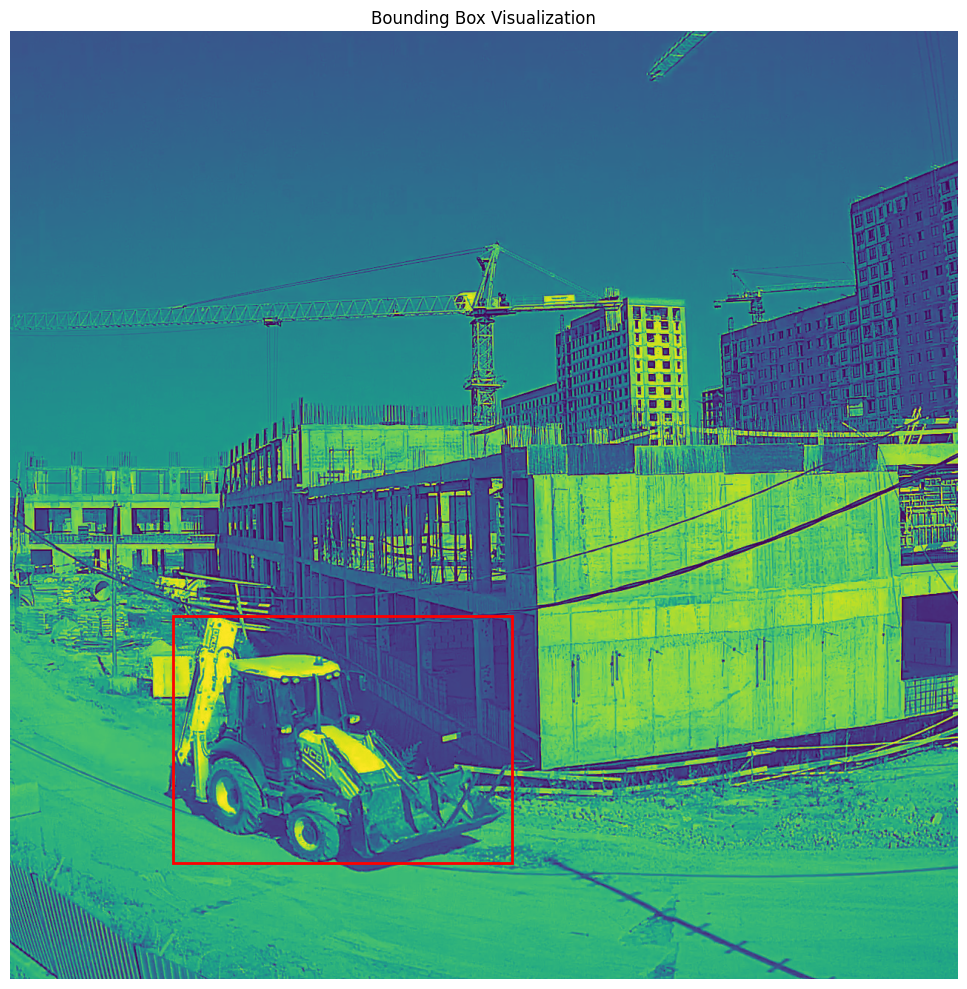

In [85]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
i: int = 0
# Создаем пустое изображение 1280x1280 (белый фон)
img = np.ones((1280, 1280, 3), dtype=np.uint8) * 255  # Белый RGB-холст

# Координаты bbox (формат x0, y0, x1, y1)
bbox = denormalize_bbox(dataset_train[i]['labels']['norm_boxes'][0], 1280, 1280)
# Создаем фигуру
fig, ax = plt.subplots(1, figsize=(10, 10))

# Отображаем изображение
ax.imshow(dataset_train[i]['pixel_values'][0])

# Создаем прямоугольник (bounding box)
rect = patches.Rectangle(
    (bbox[0], bbox[1]),       # (x,y) левого верхнего угла
    bbox[2] - bbox[0],        # width (x1 - x0)
    bbox[3] - bbox[1],        # height (y1 - y0)
    linewidth=2,
    edgecolor='r',            # Красная граница
    facecolor='none'          # Без заливки
)

# Добавляем прямоугольник на изображение
ax.add_patch(rect)

# Настройки отображения
plt.title('Bounding Box Visualization')
plt.axis('off')  # Скрываем оси
plt.tight_layout()

# Сохраняем результат
# plt.savefig('bbox_visualization.png', bbox_inches='tight', dpi=300)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


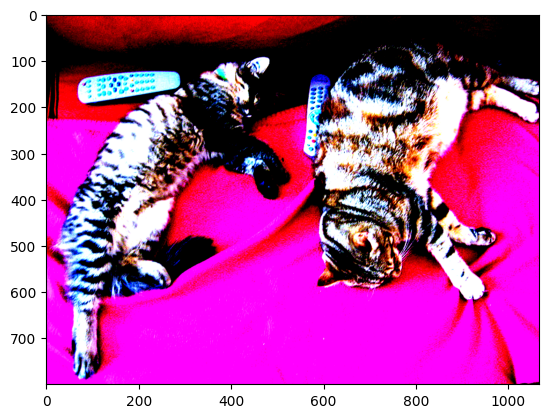

In [7]:
import matplotlib.pyplot as plt
plt.imshow(inputs['pixel_values'][0].permute(1,2,0))

In [9]:
import numpy as np
np.unique(inputs['pixel_values'])

array([-2.117904  , -2.1007793 , -2.0836544 , -2.0665298 , -2.0494049 ,
       -2.0357141 , -2.0322802 , -2.0182073 , -2.0151556 , -2.0007002 ,
       -1.9980307 , -1.9831933 , -1.980906  , -1.9656862 , -1.9637812 ,
       -1.9481792 , -1.9466565 , -1.9306722 , -1.9295317 , -1.9131652 ,
       -1.9124069 , -1.8956583 , -1.8952821 , -1.8781574 , -1.8781512 ,
       -1.8610327 , -1.8606442 , -1.843908  , -1.8431373 , -1.8267832 ,
       -1.8256302 , -1.8096584 , -1.8081232 , -1.8044444 , -1.7925336 ,
       -1.7906162 , -1.7870152 , -1.7754089 , -1.7731092 , -1.7695861 ,
       -1.7582842 , -1.7556022 , -1.7521569 , -1.7411594 , -1.7380952 ,
       -1.7347276 , -1.7240347 , -1.7205882 , -1.7172985 , -1.7069099 ,
       -1.7030813 , -1.6998693 , -1.6897851 , -1.6855742 , -1.68244   ,
       -1.6726604 , -1.6680672 , -1.6650109 , -1.6555357 , -1.6505601 ,
       -1.6475817 , -1.6384109 , -1.6330532 , -1.6301525 , -1.6212862 ,
       -1.6155462 , -1.6127234 , -1.6041614 , -1.5980392 , -1.59

In [4]:
inputs.keys()

dict_keys(['pixel_values', 'pixel_mask'])